In [1]:
import sys
ars_path = "/home/boittier/pydcm/"
sys.path.insert(1, ars_path)
from _pydcm import *


In [2]:
__name = "co2"

# The Gaussian-format cube file containing electron density:
refDensCube=f"/home/boittier/test_systems/{__name}/{__name}.chk.d.cube"
# The Gaussian-format cube file containing electrostatic potential energy:
refPotCube=f"/home/boittier/test_systems/{__name}/{__name}.chk.p.cube"
# The root folder for your fitting project
projDir=f"/home/boittier/pydcm/models/{__name}"
# The bin directory containing the MDCM scripts and programs
refBinDir="/home/boittier/pydcm/bin"
# The total charge of the molecule to be fitted (a.u.)
qtot=0.0
# The port to use for the local web browser (to view molecules in NGL). Make sure nobody else is using it already!
webPort='8885'
# The name of a Slurm partition allowing jobs to run for up to 2 hours with 4 cores
shortQ='short'
longQ='long'
# The desired isodensity surface to use for viewing potential energy surfaces (a.u)
isoSurf=0.001


# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=1
# Maximum number of charges to fit per atom (minimum is fixed at 1)
maxAChg=2

natm=3
nfrag = 1

minMChg=3
maxMChg=6

# Define fragments using atom numbering from NGL window at top of notebook
frags= [[1,2,3]] 
# Minimum number of charges to fit for each fragment (can average fewer than 1 per atom)
minFChg=[3]
# Maximum number of charges to fit for each fragment (upper limit per atom fixed by maxAChg)
maxFChg=[6]

workdir = projDir + '/'
refdir = workdir + 'ref/'
htmldir = workdir + 'html/'
bindir = refBinDir + '/'
pdbfile = refdir + 'mol.pdb'
densCube = refdir + os.path.basename(refDensCube)
potCube = refdir + os.path.basename(refPotCube)

In [3]:
pydcm = Pydcm(projDir, refBinDir, refDensCube, refPotCube, webPort, frags, minFChg, maxFChg, maxAChg, minMChg, maxMChg, shortQ, longQ)

In [4]:
pydcm.make_ref_directory()
pydcm.start_server()

Changed to working directory /home/boittier/pydcm/models/co2/
3 atoms in molecule
writing PDB file /home/boittier/pydcm/models/co2/ref/mol.pdb

Running jobs:python /home/boittier/pydcm/bin/simple-cors-http-server.py 8885

0 : run_http()

Web server running in directory /home/boittier/pydcm/models/co2, URLs are relative to this path
If you change the project directory, you need to restart Jupyter-Lab to restart this server and create a new root for URLs


In [5]:
pydcm.show_ref_models()

ESP range: -0.0451056 to 0.0451056 a.u.
8885 /home/boittier/pydcm/models/co2/html/ /home/boittier/pydcm/models/co2/ref/mol.pdb
http://localhost:8885/html/refESP.html


In [6]:
pydcm.display_mtpfit_comparison()


/home/boittier/pydcm/bin/mtpfit.py


slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified



## 1Charges Per Atom:
Atom 1 final RMSE: 1.064057089 kcal/mol
Atom 2 final RMSE: 1.029925059 kcal/mol
Atom 3 final RMSE: 0.577991169 kcal/mol

## 2Charges Per Atom:
Atom 1 final RMSE: 0.6582105703 kcal/mol
Atom 2 final RMSE: 0.1513221837 kcal/mol
Atom 3 final RMSE: 0.1478142279 kcal/mol


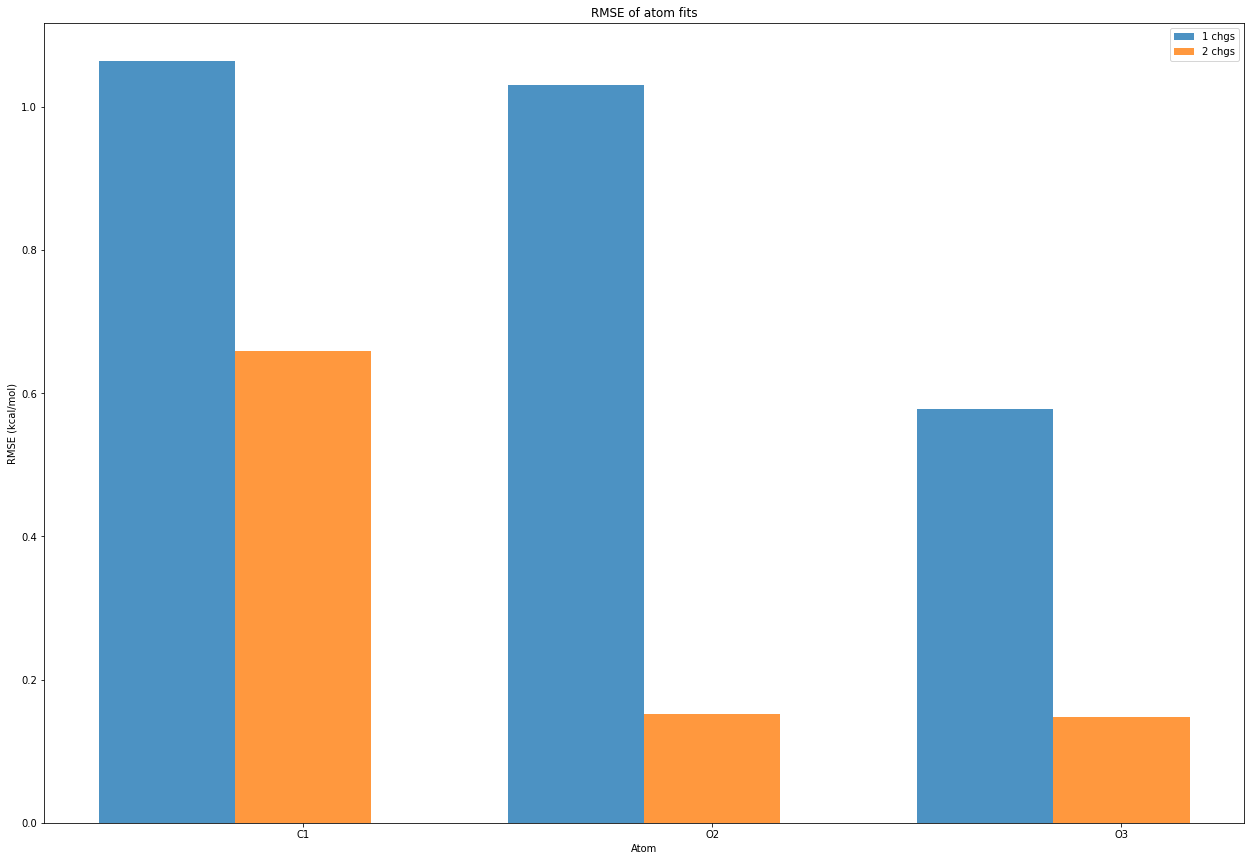

In [7]:
pydcm.do_atom_fit(maxAChg, ntry, nfrag)

slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified



Summary of results:
Frag 1, Fit 1, 3 charges, RMSE: 0.2655460721 kcal/mol
Frag 1, Fit 1, 4 charges, RMSE: 0.23175437 kcal/mol
Frag 1, Fit 1, 5 charges, RMSE: 0.2317541823 kcal/mol
Frag 1, Fit 1, 6 charges, RMSE: 0.2319883725 kcal/mol


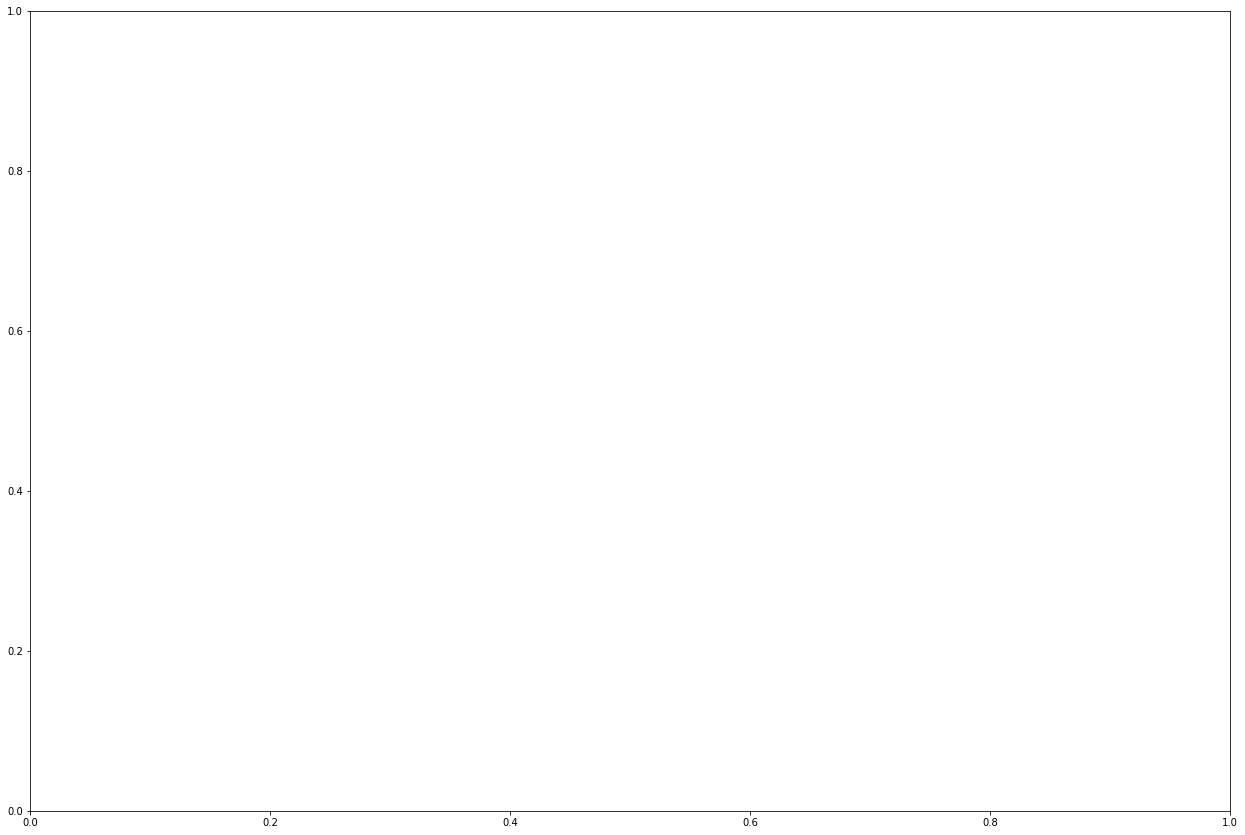

In [8]:
# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=1
# Number of separate fits to perform (restarting a fit can lead to a better outcome). Cost scales linearly
nfit=1

pydcm.fit_fragments(ntry, nfit)

In [9]:
pydcm.combine_fragements(ntry, nfit)

3 CHARGES:
NEW BEST 3 charges: 3 rmse = 0.2655460721
4 CHARGES:
NEW BEST 4 charges: 4 rmse = 0.23175437
5 CHARGES:
NEW BEST 5 charges: 5 rmse = 0.2317541823
6 CHARGES:
NEW BEST 6 charges: 6 rmse = 0.2319883725


slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified


Job 636749 has crashed, resubmitting
submitted jobID 639531
Job 636750 has crashed, resubmitting
submitted jobID 639532
Job 636751 has crashed, resubmitting
submitted jobID 639533
Job 636752 has crashed, resubmitting
submitted jobID 639534

Summary of results:


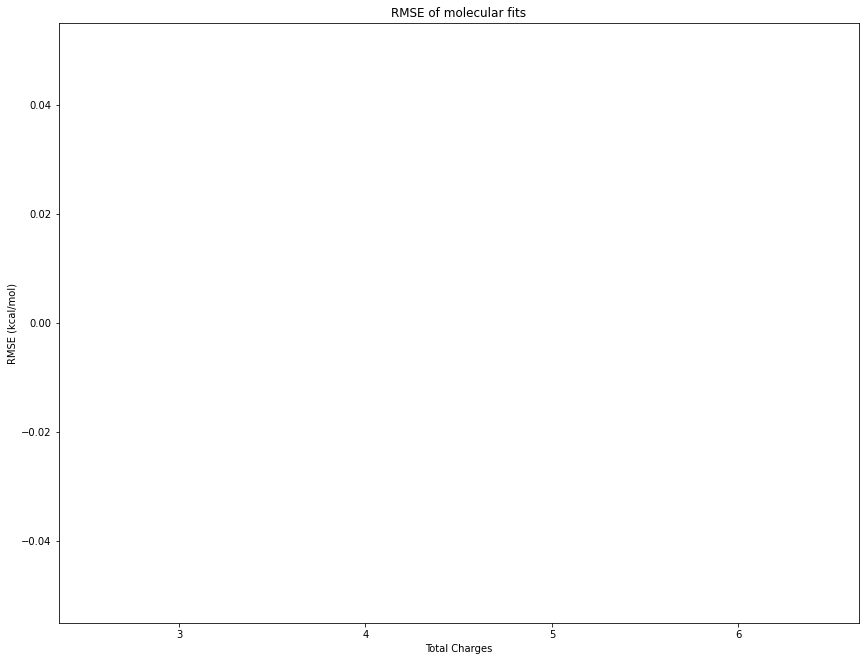

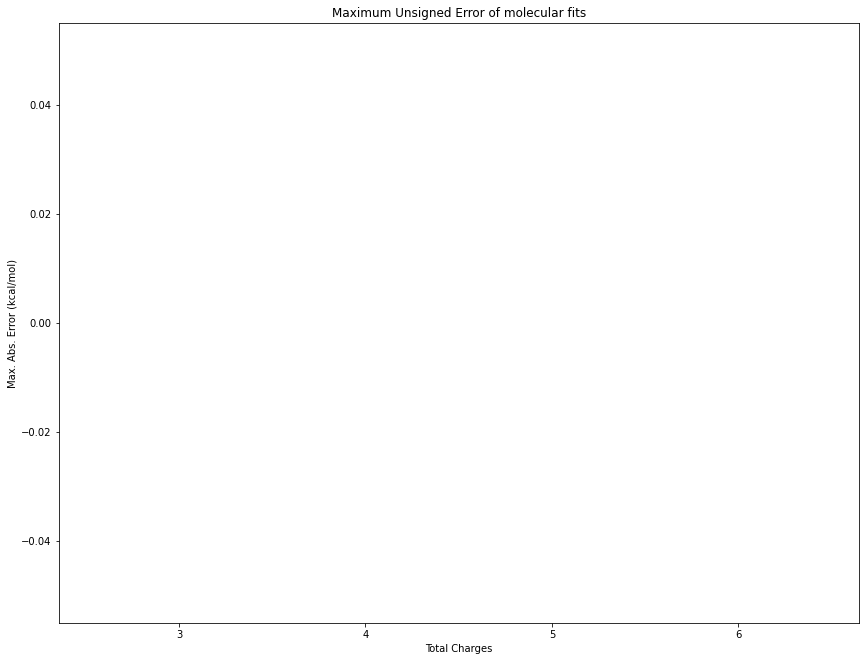

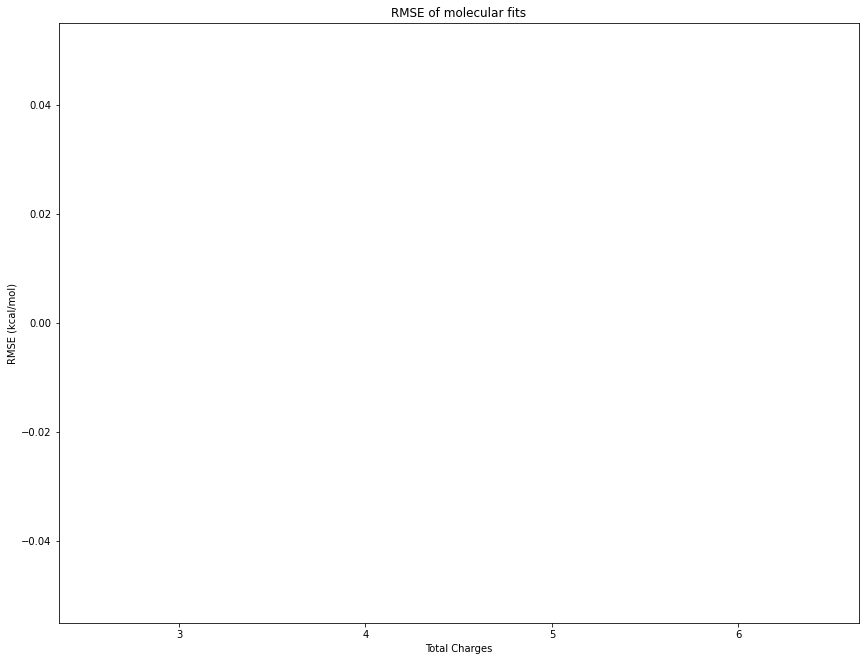

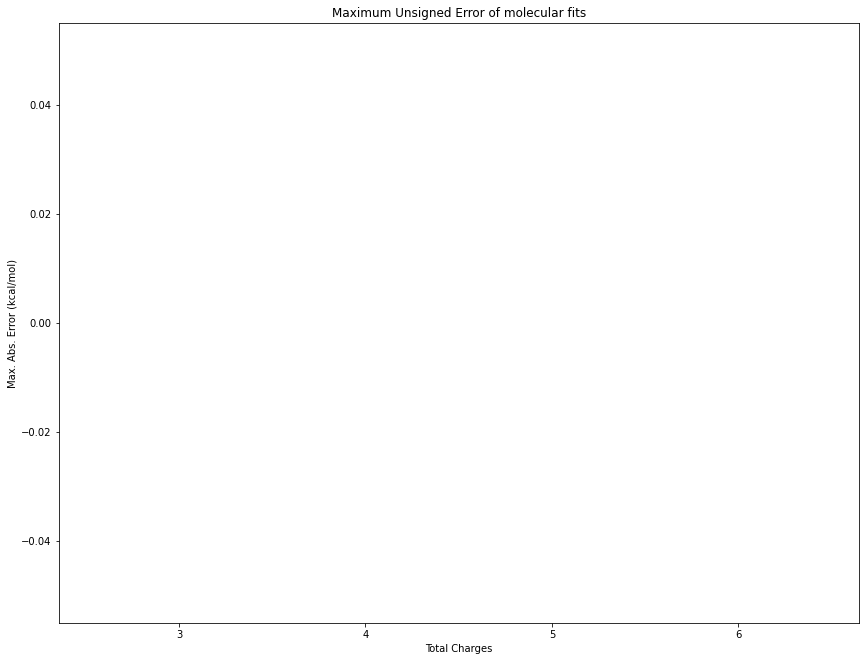

In [10]:
pydcm.refine_models()

Ditriantapole RMSE: 3.799888416E-01
0.04845684579
Monopole RMSE: 8.029232540E-01
0.206634443
satisfied
Quadrupole RMSE: 3.806049986E-01
0.04876728984
20 charge model RMSE: 4.104549475E-01
0.06484723241
[0.3799888416, 0.8100493809, 0.122851282, 0.04845684579, 0.802923254, 1.586146251, 0.5155074333, 0.206634443, 0.3806049986, 0.8112678472, 0.1233018696, 0.04876728984, 0.4104549475, 0.8621458337, 0.169165466, 0.06484723241]


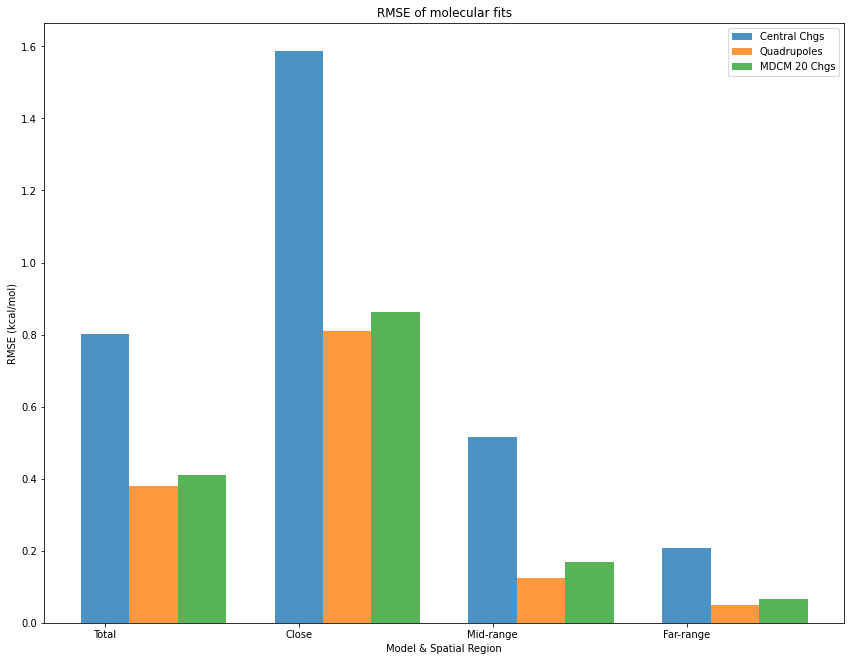

NameError: name 'densCube' is not defined

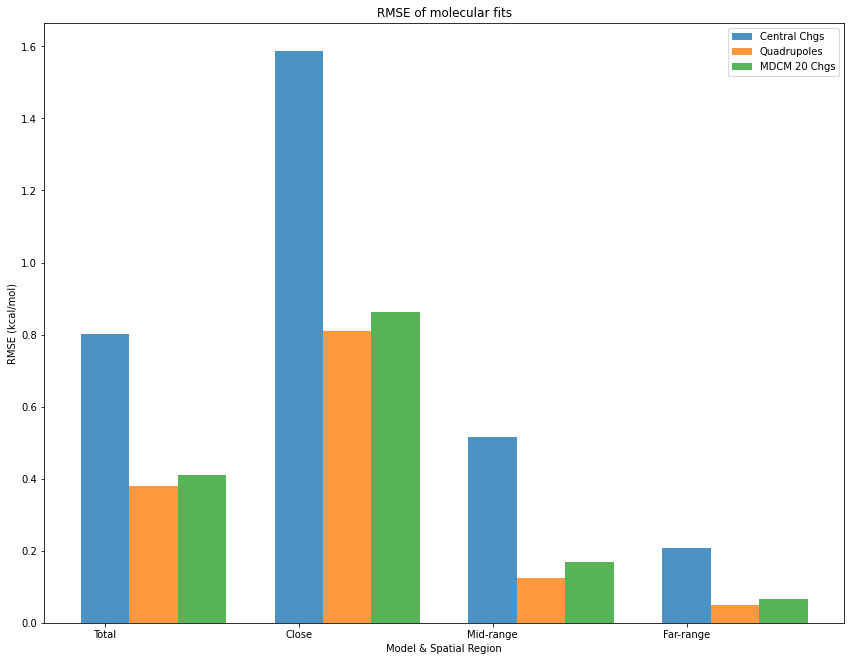

In [11]:
pydcm.analyse_model(20)

In [ ]:
pydcm.refinedir